# Binary Image Classification with CNN and Transfer Learning

#### Mahmud Hasan
### s4mahasa@uni-trier.de
#### Universität Trier, Germany
#### Date: 26.11.21

Can You classify Asian or African Elephants from images without knowing too much about their characteristics, shape, behaviour etc.? I bet you can't. It may take some days or weeks to find out dissimilarities and the key characteristics. Luckily, with the help of the Convolutional Neural Network, we do not need to be an expert. With some knowledge of coding with CNN we can classify them very accurately. The accuracy in our case is almost 90%. Isn't it exciting? How easy with **CNN** and **Transfer learning** to classify Elephants from images.

[Data Source](https://www.kaggle.com/vivmankar/asian-vs-african-elephant-image-classification)

### **Dataset details**
- Number of classes: 2 (Asian elephant and African elephant )
- Number of images: 1028
- Image shape range: ( 100, 100) to (4992, 3328)
- To increase complexity the train set contains less than **5% mislabeled images**, while all images in the test set have the - correct label.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [101]:
# This function increases the cell width 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Number of images in our train and test set
for dirpath , dirname, filenames in os.walk('E:\\Projects\\dataset'):
    print('There are {} directories and {} images in {}'.format(len(dirname), len(filenames),dirpath))
                                          

There are 2 directories and 0 images in E:\Projects\dataset
There are 2 directories and 0 images in E:\Projects\dataset\test
There are 0 directories and 97 images in E:\Projects\dataset\test\African
There are 0 directories and 91 images in E:\Projects\dataset\test\Asian
There are 2 directories and 0 images in E:\Projects\dataset\train
There are 0 directories and 420 images in E:\Projects\dataset\train\African
There are 0 directories and 420 images in E:\Projects\dataset\train\Asian


In [33]:
import pathlib
data_dir = pathlib.Path("dataset/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['African' 'Asian']


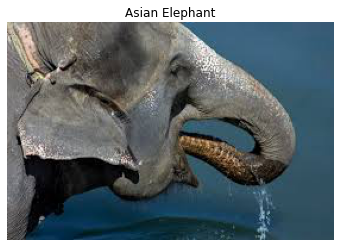

In [34]:
img = mpimg.imread('E:/Projects/dataset/train/Asian/as_tr25.jpg')
plt.imshow(img)
plt.title('Asian Elephant')
plt.axis(False)
plt.show()

In [35]:
img

array([[[188, 183, 154],
        [181, 176, 147],
        [192, 188, 163],
        ...,
        [ 54,  90, 116],
        [ 54,  90, 116],
        [ 53,  89, 115]],

       [[203, 196, 168],
        [193, 187, 161],
        [183, 177, 153],
        ...,
        [ 54,  90, 116],
        [ 54,  90, 116],
        [ 53,  89, 115]],

       [[190, 183, 155],
        [197, 190, 164],
        [180, 174, 150],
        ...,
        [ 54,  90, 116],
        [ 54,  90, 116],
        [ 54,  90, 116]],

       ...,

       [[ 53,  49,  46],
        [ 77,  73,  70],
        [ 82,  78,  75],
        ...,
        [ 47,  77,  88],
        [ 47,  77,  88],
        [ 47,  77,  88]],

       [[ 99,  95,  92],
        [ 99,  95,  92],
        [ 94,  90,  87],
        ...,
        [ 47,  77,  88],
        [ 47,  77,  88],
        [ 47,  77,  88]],

       [[ 56,  52,  49],
        [ 76,  72,  69],
        [ 67,  63,  60],
        ...,
        [ 48,  76,  88],
        [ 48,  76,  88],
        [ 48,  76,  88]]

In [36]:
print('The shape of the image: {}'.format(img.shape))

The shape of the image: (183, 275, 3)


In [37]:
# Randomly show pictures from the file
import random

def random_elephant(dir_name, target_class):
    target_folder = dir_name + target_class
    img = mpimg.imread(target_folder + '/' + ''.join(random.sample(os.listdir(target_folder),1)))
    plt.imshow(img)
    #print('Shape of the image {}'.format(img.shape))
    plt.title('{} Elephant'.format(target_class))
    plt.axis(False)
    #plt.show()

In [157]:
dir_name = './dataset/train/'

### Images of African Elephant

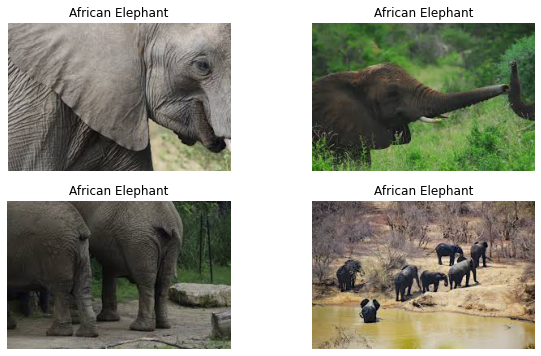

In [158]:
# Random images of African elephants
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
random_elephant(dir_name, target_class= 'African')
plt.subplot(2,2,2)
random_elephant(dir_name, target_class = 'African')
plt.subplot(2,2,3)
random_elephant(dir_name, target_class= 'African')
plt.subplot(2,2,4)
random_elephant(dir_name, target_class = 'African')
plt.show()

### Images of Asian Elephant

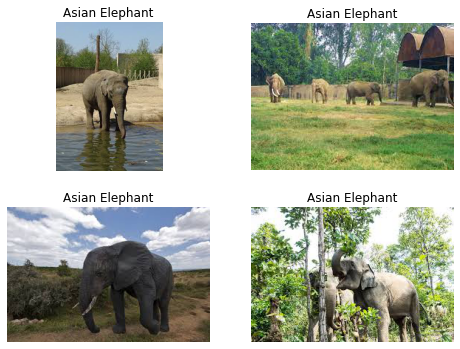

In [95]:
plt.figure(figsize = (8,6))
plt.subplot(2,2,1)
random_elephant(dir_name, target_class= 'Asian')
plt.subplot(2,2,2)
random_elephant(dir_name, target_class = 'Asian')
plt.subplot(2,2,3)
random_elephant(dir_name, target_class= 'Asian')
plt.subplot(2,2,4)
random_elephant(dir_name, target_class = 'Asian')
plt.show()

A number of mislabelled images are included in the train images of both categories.Let's look a few of them.


## Mislabeled images of African Elephants

In [96]:
img_1 = mpimg.imread('./dataset/train/African/af_tr5.jpg')
img_2 = mpimg.imread('./dataset/train/African/af_tr33.jpg')
img_3 = mpimg.imread('./dataset/train/African/af_tr313.jpeg')
img_4 = mpimg.imread('./dataset/train/African/af_tr278.jpg')

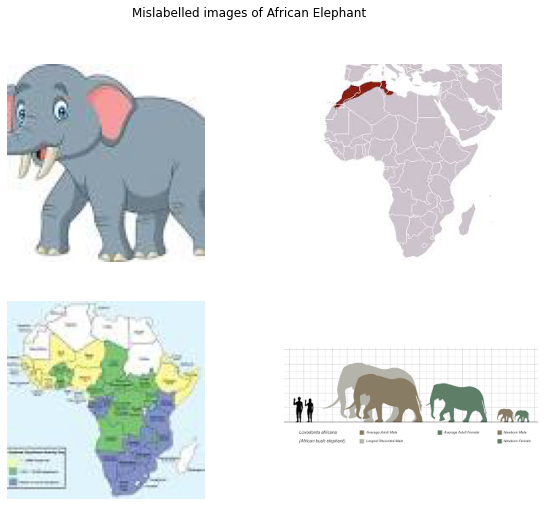

In [97]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
ax1.imshow(img_1)
ax2.imshow(img_2)
ax3.imshow(img_3)
ax4.imshow(img_4)

plt.suptitle('Mislabelled images of African Elephant')
ax1.axis(False)
ax2.axis(False)
ax3.axis(False)
ax4.axis(False)
plt.show()

## Mislabeled images of Asian Elephants

In [159]:
img_1 = mpimg.imread('./dataset/train/Asian/as_tr16.jpeg')
img_2 = mpimg.imread('./dataset/train/Asian/as_tr294.jpg')
img_3 = mpimg.imread('./dataset/train/Asian/as_tr175.jpg')
img_4 = mpimg.imread('./dataset/train/Asian/as_tr414.jpg')

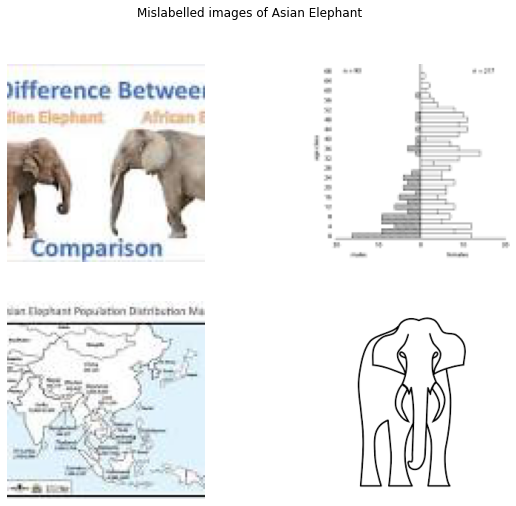

In [160]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,8))
ax1.imshow(img_1)
ax2.imshow(img_2)
ax3.imshow(img_3)
ax4.imshow(img_4)

plt.suptitle('Mislabelled images of Asian Elephant')
ax1.axis(False)
ax2.axis(False)
ax3.axis(False)
ax4.axis(False)
plt.show()

In [ ]:
# Set the data directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = 'E:/Projects/dataset/train/'
test_dir = 'E:/Projects/dataset/test/'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                  target_size= (150,150),
                                                  batch_size = 32,
                                                   class_mode = 'binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


**In each batch, there are 32 images with corresponding labels**

In [ ]:
images, labels = train_data.next() 
len(images), len(labels)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

 **Model checkpoint callback**

In [103]:
def create_callback(model_name, save_path = 'E:/Projects/Image Classification/model experiments/'):
    '''Remember the epoch in which model works best'''
    return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),monitor='val_loss',verbose=0,save_best_only=True)

### Model 1:  Model with one hidden layer

In [107]:
# model-01     
tf.random.set_seed(42)

model_1 = Sequential([
    Flatten(input_shape=(3, 150, 150)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
], name = 'model_1')


# compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#Fit the model

model_1_history = model_1.fit(train_data,
                             steps_per_epoch= len(train_data), 
                             epochs = 30,
                             callbacks = [create_callback(model_1.name)],
                             verbose=1,
                             validation_data= test_data,
                             validation_steps= len(test_data))

Epoch 1/30
27/27 [==============================] - 11s 422ms/step - loss: 2.6850 - accuracy: 0.4976 - val_loss: 1.7053 - val_accuracy: 0.5160
Epoch 2/30
27/27 [==============================] - 10s 385ms/step - loss: 1.0395 - accuracy: 0.5524 - val_loss: 0.7727 - val_accuracy: 0.5479
Epoch 3/30
27/27 [==============================] - 9s 326ms/step - loss: 0.8037 - accuracy: 0.5667 - val_loss: 0.9904 - val_accuracy: 0.5053
Epoch 4/30
27/27 [==============================] - 11s 392ms/step - loss: 0.7467 - accuracy: 0.6190 - val_loss: 0.6267 - val_accuracy: 0.6702
Epoch 5/30
27/27 [==============================] - 9s 331ms/step - loss: 0.7076 - accuracy: 0.6357 - val_loss: 1.0583 - val_accuracy: 0.5266
Epoch 6/30
27/27 [==============================] - 10s 357ms/step - loss: 0.6876 - accuracy: 0.6440 - val_loss: 0.8137 - val_accuracy: 0.4947
Epoch 7/30
27/27 [==============================] - 10s 360ms/step - loss: 0.7476 - accuracy: 0.6012 - val_loss: 0.7249 - val_accuracy: 0.6117
E

In [108]:
model_1 = tf.keras.models.load_model('E:/Projects/Image Classification/model experiments/model_1')
model_1.evaluate(test_data)

6/6 [==============================] - 5s 898ms/step - loss: 0.5360 - accuracy: 0.7234


[0.5360327959060669, 0.7234042286872864]

In [111]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2160032   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,160,065
Trainable params: 2,160,065
Non-trainable params: 0
_________________________________________________________________


In [109]:
def plot_loss_acc(model_name):
    df = pd.DataFrame(model_name.history)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))
    ax1.plot(df.loss, label = 'loss')
    ax1.plot(df.val_loss, label = 'val_loss')
    ax1.legend()
    ax1.set(xlabel='epochs')
     
    ax2.plot(df.accuracy, label = 'acc')
    ax2.plot(df.val_accuracy, label = 'val_acc')
    ax2.legend()
    ax2.set(xlabel='epochs')
    plt.show()

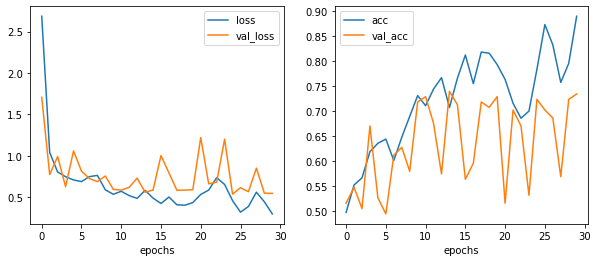

In [110]:
plot_loss_acc(model_1_history) 

**our model faces overfitting problem. Validation accuracy is not going down. Whereas, training accuracy is countinously improving.**

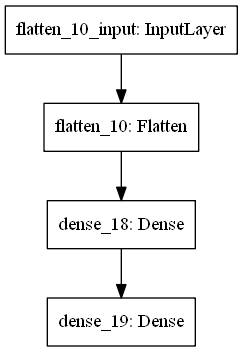

In [138]:
from tensorflow.keras import utils

utils.plot_model(model_1)

### Model 2:  Model with 2 hidden layers

In [112]:
# model -02

tf.random.set_seed(42)

model_2 = Sequential([
    Flatten(input_shape=(3, 150, 150)),
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
], name = 'model_2')


# compile the model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#Fit the model

model_2_history = model_2.fit(train_data,
                              steps_per_epoch= len(train_data), 
                             epochs = 30,
                             verbose=1,
                             callbacks = [create_callback(model_2.name)],
                             validation_data= test_data,
                             validation_steps= len(test_data))

Epoch 1/30
27/27 [==============================] - 12s 436ms/step - loss: 1.5824 - accuracy: 0.5012 - val_loss: 0.6726 - val_accuracy: 0.5532
Epoch 2/30
27/27 [==============================] - 9s 327ms/step - loss: 0.8711 - accuracy: 0.5345 - val_loss: 0.7027 - val_accuracy: 0.5372
Epoch 3/30
27/27 [==============================] - 11s 389ms/step - loss: 0.7181 - accuracy: 0.5560 - val_loss: 0.6289 - val_accuracy: 0.6489
Epoch 4/30
27/27 [==============================] - 9s 327ms/step - loss: 0.6421 - accuracy: 0.6357 - val_loss: 0.6403 - val_accuracy: 0.6330
Epoch 5/30
27/27 [==============================] - 9s 326ms/step - loss: 0.6305 - accuracy: 0.6571 - val_loss: 0.6327 - val_accuracy: 0.6702
Epoch 6/30
27/27 [==============================] - 11s 393ms/step - loss: 0.6607 - accuracy: 0.6238 - val_loss: 0.6156 - val_accuracy: 0.6596
Epoch 7/30
27/27 [==============================] - 9s 324ms/step - loss: 0.6261 - accuracy: 0.6476 - val_loss: 0.6284 - val_accuracy: 0.6649
Epo

In [145]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2160032   
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 2,161,121
Trainable params: 2,161,121
Non-trainable params: 0
_________________________________________________________________


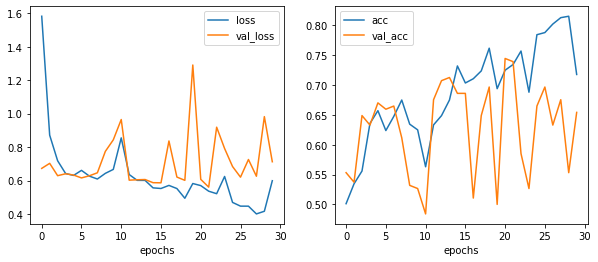

In [113]:
plot_loss_acc(model_2_history)  

In [147]:
model_2 = tf.keras.models.load_model('E:/Projects/Image Classification/model experiments/model_2')
model_2.evaluate(test_data)

6/6 [==============================] - 3s 561ms/step - loss: 0.6064 - accuracy: 0.6809


[0.606441080570221, 0.6808510422706604]

`Model_2` can not beat `Model_1`. Even addding one more hidden layer doesn't help much.

### Model 3 : Model with single Convolution and Maxpooling layer

In [114]:
# model -03

tf.random.set_seed(42)

model_3 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, input_shape = (150,150,3)),
    MaxPool2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    Flatten(),
    #Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
], name = 'model_3')


# compile the model

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#Fit the model

model_3_history = model_3.fit(train_data,
                            steps_per_epoch= len(train_data), 
                             epochs = 30,
                             verbose=1,
                              callbacks = [create_callback(model_3.name)],
                             validation_data= test_data,
                             validation_steps= len(test_data))

Epoch 1/30
27/27 [==============================] - 16s 579ms/step - loss: 3.3567 - accuracy: 0.5155 - val_loss: 1.0056 - val_accuracy: 0.5957
Epoch 2/30
27/27 [==============================] - 14s 516ms/step - loss: 0.7215 - accuracy: 0.6250 - val_loss: 0.7309 - val_accuracy: 0.6011
Epoch 3/30
27/27 [==============================] - 15s 568ms/step - loss: 0.4961 - accuracy: 0.7571 - val_loss: 0.5097 - val_accuracy: 0.7713
Epoch 4/30
27/27 [==============================] - 14s 508ms/step - loss: 0.3943 - accuracy: 0.8619 - val_loss: 0.5294 - val_accuracy: 0.7128
Epoch 5/30
27/27 [==============================] - 15s 558ms/step - loss: 0.3240 - accuracy: 0.8952 - val_loss: 0.4819 - val_accuracy: 0.7606
Epoch 6/30
27/27 [==============================] - 13s 481ms/step - loss: 0.2765 - accuracy: 0.9202 - val_loss: 0.4928 - val_accuracy: 0.7500
Epoch 7/30
27/27 [==============================] - 13s 491ms/step - loss: 0.2537 - accuracy: 0.9202 - val_loss: 0.4840 - val_accuracy: 0.7394

In [156]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 10)      280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 147, 147, 10)      0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 216090)            0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 216091    
Total params: 216,371
Trainable params: 216,371
Non-trainable params: 0
_________________________________________________________________


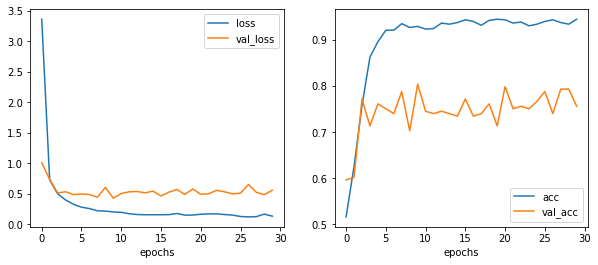

In [115]:
plot_loss_acc(model_3_history)  

In [ ]:
model_3 = tf.keras.models.load_model('E:/Projects/Image Classification/model experiments/model_3')
model_3.evaluate(test_data)

`Model_3` performs slightly better than `Model_1` interms of `val_accuracy`. However, `Model_3` is severly affected by overfitting.

In order to avoid overfitting, we are going to use a **Regularization Techniques** called `Dropout`. We consider 20% of the unit as `Dropout` 

In [116]:
from tensorflow.keras.layers import Dropout

In [117]:
# model -04

model_4 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape = (150,150,3)),
    MaxPool2D(pool_size= 2),
    Dropout(.2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(2),
    Dropout(.2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(2),
    Dropout(.2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
], name = 'model_4')


# compile the model

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#Fit the model

model_4_history = model_4.fit(train_data,
                            steps_per_epoch= len(train_data), 
                            epochs = 30,
                            verbose=1,
                            callbacks = [create_callback(model_4.name)],
                            validation_data= test_data,
                            validation_steps= len(test_data))

Epoch 1/30
27/27 [==============================] - 9s 347ms/step - loss: 0.7159 - accuracy: 0.5119 - val_loss: 0.6887 - val_accuracy: 0.5851
Epoch 2/30
27/27 [==============================] - 9s 337ms/step - loss: 0.6909 - accuracy: 0.5262 - val_loss: 0.6847 - val_accuracy: 0.6330
Epoch 3/30
27/27 [==============================] - 9s 349ms/step - loss: 0.6834 - accuracy: 0.5524 - val_loss: 0.6793 - val_accuracy: 0.5904
Epoch 4/30
27/27 [==============================] - 7s 276ms/step - loss: 0.6739 - accuracy: 0.5857 - val_loss: 0.6912 - val_accuracy: 0.5053
Epoch 5/30
27/27 [==============================] - 9s 334ms/step - loss: 0.6759 - accuracy: 0.5774 - val_loss: 0.6674 - val_accuracy: 0.6223
Epoch 6/30
27/27 [==============================] - 9s 335ms/step - loss: 0.6694 - accuracy: 0.6083 - val_loss: 0.6550 - val_accuracy: 0.6170
Epoch 7/30
27/27 [==============================] - 7s 271ms/step - loss: 0.6683 - accuracy: 0.5821 - val_loss: 0.6559 - val_accuracy: 0.6436
Epoch 

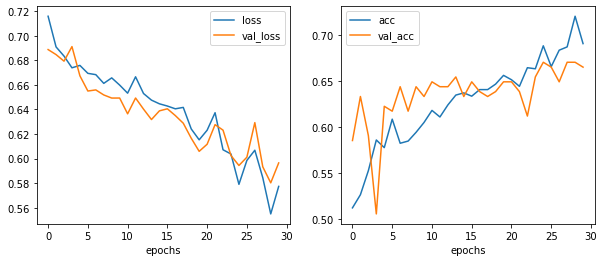

In [121]:
plot_loss_acc(model_4_history)

In [156]:
model_4 = tf.keras.models.load_model('E:/Projects/Image Classification/model experiments/model_4')
model_4.evaluate(test_data)

6/6 [==============================] - 3s 509ms/step - loss: 0.5803 - accuracy: 0.6702


[0.5803037881851196, 0.6702127456665039]

`Model_4` overcomes the problem of overfitting very nicely. However, the `val_accuray` is lower than previous models.

# Image data Augmentaion

Our previous model `model_4` works pretty well against overfitting but the accuracy of the model was not good enough. This may happen because of the small dataset. Model doesn't have enough images to learn the pattern. On the other hand, some images are mislabeled and misleading. 

Therefore, we are going to use another technique called **Image Data Augmentation**.

[Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

In [122]:
# In image data augmentation, only training dataset will be augmented. Test dataset reamin same as before.

train_data_augmented = ImageDataGenerator(rescale = 1./255, 
                                          rotation_range=0.2, 
                                          shear_range=0.2, 
                                          zoom_range=0.2, 
                                          width_shift_range=0.2, 
                                          height_shift_range=0.3, 
                                         horizontal_flip=True)

train_aug_data = train_data_augmented.flow_from_directory(train_dir, 
                                                        target_size = (150,150),
                                                        batch_size=32,
                                                        class_mode= 'binary', shuffle = True)

Found 840 images belonging to 2 classes.


In [123]:
images, labels = train_aug_data.next() 
len(images), len(labels)

(32, 32)

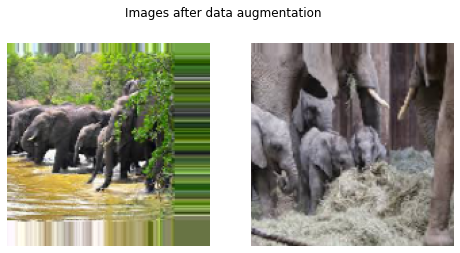

In [127]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.imshow(images[1])
ax1.axis(False)
ax2.imshow(images[4])
ax2.axis(False)
plt.suptitle('Images after data augmentation')
plt.show()

In [128]:
# model with augmented data
model_1_aug = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation='relu', input_shape = (150,150,3)),
    MaxPool2D(pool_size= 2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
], name = 'model_1_aug')


# compile the model

model_1_aug.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#Fit the model

model_1_aug_history = model_1_aug.fit(train_aug_data,
                            steps_per_epoch= len(train_aug_data), 
                             epochs = 30,
                             verbose=1,
                            callbacks = [create_callback(model_1_aug.name)],
                             validation_data= test_data,
                             validation_steps= len(test_data))

Epoch 1/30
27/27 [==============================] - 10s 363ms/step - loss: 0.6932 - accuracy: 0.5226 - val_loss: 0.6896 - val_accuracy: 0.4894
Epoch 2/30
27/27 [==============================] - 10s 355ms/step - loss: 0.6906 - accuracy: 0.5536 - val_loss: 0.6822 - val_accuracy: 0.6383
Epoch 3/30
27/27 [==============================] - 9s 341ms/step - loss: 0.6903 - accuracy: 0.5274 - val_loss: 0.6763 - val_accuracy: 0.5372
Epoch 4/30
27/27 [==============================] - 10s 355ms/step - loss: 0.6842 - accuracy: 0.5714 - val_loss: 0.6627 - val_accuracy: 0.6383
Epoch 5/30
27/27 [==============================] - 10s 357ms/step - loss: 0.6836 - accuracy: 0.5571 - val_loss: 0.6564 - val_accuracy: 0.6223
Epoch 6/30
27/27 [==============================] - 9s 344ms/step - loss: 0.6805 - accuracy: 0.5702 - val_loss: 0.6338 - val_accuracy: 0.6489
Epoch 7/30
27/27 [==============================] - 8s 304ms/step - loss: 0.6787 - accuracy: 0.5667 - val_loss: 0.6407 - val_accuracy: 0.6223
Ep

In [129]:
model_1_aug.summary()

Model: "model_1_aug"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 10)        910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2890)              

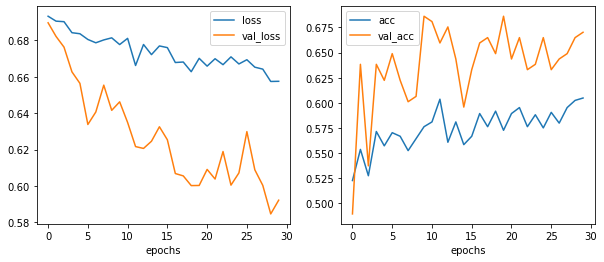

In [161]:
plot_loss_acc(model_1_aug_history)

In [162]:
model_1_aug = tf.keras.models.load_model('E:/Projects/Image Classification/model experiments/model_1_aug')
model_1_aug.evaluate(test_data)

6/6 [==============================] - 3s 547ms/step - loss: 0.5847 - accuracy: 0.6649


[0.5846969485282898, 0.664893627166748]

Data Augmentation doesn't help much in our case. We are now facing underfitting issues as Training loss is much higher than validation loss and Training accuracy is lower than validation accuracy.

In [135]:
import tensorflow_hub as hub
from tensorflow.keras import layers

## Transfer Learning

We have tried several models to improve our classification. None of our models couldn't reach near 80% accuracy in prediction. We are now going to use another technique called **Transfer Learning**. 
According to `Wikipedia` 'Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.' We are going to use some of the `Deep Neural Network` models which are trained on some gold standard datasets such as Imagenet.
The models we are going to use are:
- **Resnet_v2_50**
- **Efficientnet_b0**

In [133]:
# Resnet_v2_50 
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
# Efficientnet
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [134]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # ignoring autograph warning

### Resnet_v2_50 model

In [136]:
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                         trainable= False,
                                         name = 'feature_extraction_layer',
                                       input_shape = (150,150,3))
tf.random.set_seed(42)

model_res = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1, activation = 'sigmoid', name = 'output_layer')
], name = 'model_res')

#
model_res.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model_res_history = model_res.fit(train_data,
                               steps_per_epoch= len(train_data), 
                               epochs = 20,
                               verbose=1,
                               callbacks = [create_callback(model_res.name)],
                               validation_data= test_data,
                               validation_steps= len(test_data))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/20
27/27 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.6143INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 29s 1s/step - loss: 0.7164 - accuracy: 0.6143 - val_loss: 0.5518 - val_accuracy: 0.7287
Epoch 2/20
27/27 [==============================] - ETA: 0s - loss: 0.5770 - accuracy: 0.7131INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 28s 1s/step - loss: 0.5770 - accuracy: 0.7131 - val_loss: 0.4907 - val_accuracy: 0.7606
Epoch 3/20
27/27 [==============================] - ETA: 0s - loss: 0.5164 - accuracy: 0.7405INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 28s 1s/step - loss: 0.5164 - accuracy: 0.7405 - val_loss: 0.4655 - val_accuracy: 0.7926
Epoch 4/20
27/27 [==============================] - ETA: 0s - loss: 0.4808 - accuracy: 0.7667INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 28s 1s/step - loss: 0.4808 - accuracy: 0.7667 - val_loss: 0.4454 - val_accuracy: 0.7819
Epoch 5/20
27/27 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7857INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 28s 1s/step - loss: 0.4615 - accuracy: 0.7857 - val_loss: 0.4342 - val_accuracy: 0.7979
Epoch 6/20
27/27 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.8000INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 29s 1s/step - loss: 0.4400 - accuracy: 0.8000 - val_loss: 0.4134 - val_accuracy: 0.8032
Epoch 7/20
27/27 [==============================] - 21s 763ms/step - loss: 0.4211 - accuracy: 0.8119 - val_loss: 0.4161 - val_accuracy: 0.8085
Epoch 8/20
27/27 [==============================] - ETA: 0s - loss: 0.4062 - accuracy: 0.8262INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 29s 1s/step - loss: 0.4062 - accuracy: 0.8262 - val_loss: 0.4011 - val_accuracy: 0.8245
Epoch 9/20
27/27 [==============================] - 21s 776ms/step - loss: 0.3900 - accuracy: 0.8333 - val_loss: 0.4266 - val_accuracy: 0.8191
Epoch 10/20
27/27 [==============================] - 23s 846ms/step - loss: 0.3782 - accuracy: 0.8440 - val_loss: 0.4084 - val_accuracy: 0.8245
Epoch 11/20
27/27 [==============================] - ETA: 0s - loss: 0.3680 - accuracy: 0.8512INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 31s 1s/step - loss: 0.3680 - accuracy: 0.8512 - val_loss: 0.3918 - val_accuracy: 0.8351
Epoch 12/20
27/27 [==============================] - ETA: 0s - loss: 0.3569 - accuracy: 0.8571INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 31s 1s/step - loss: 0.3569 - accuracy: 0.8571 - val_loss: 0.3907 - val_accuracy: 0.8191
Epoch 13/20
27/27 [==============================] - 21s 793ms/step - loss: 0.3473 - accuracy: 0.8571 - val_loss: 0.3951 - val_accuracy: 0.8351
Epoch 14/20
27/27 [==============================] - 21s 790ms/step - loss: 0.3420 - accuracy: 0.8714 - val_loss: 0.3909 - val_accuracy: 0.8298
Epoch 15/20
27/27 [==============================] - ETA: 0s - loss: 0.3309 - accuracy: 0.8738INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 31s 1s/step - loss: 0.3309 - accuracy: 0.8738 - val_loss: 0.3777 - val_accuracy: 0.8457
Epoch 16/20
27/27 [==============================] - 21s 795ms/step - loss: 0.3409 - accuracy: 0.8500 - val_loss: 0.3850 - val_accuracy: 0.8404
Epoch 17/20
27/27 [==============================] - 22s 815ms/step - loss: 0.3219 - accuracy: 0.8679 - val_loss: 0.4206 - val_accuracy: 0.7979
Epoch 18/20
27/27 [==============================] - ETA: 0s - loss: 0.3206 - accuracy: 0.8690INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_res\assets


27/27 [==============================] - 33s 1s/step - loss: 0.3206 - accuracy: 0.8690 - val_loss: 0.3689 - val_accuracy: 0.8670
Epoch 19/20
27/27 [==============================] - 22s 806ms/step - loss: 0.3079 - accuracy: 0.8857 - val_loss: 0.3733 - val_accuracy: 0.8404
Epoch 20/20
27/27 [==============================] - 23s 844ms/step - loss: 0.3015 - accuracy: 0.8786 - val_loss: 0.4052 - val_accuracy: 0.8138


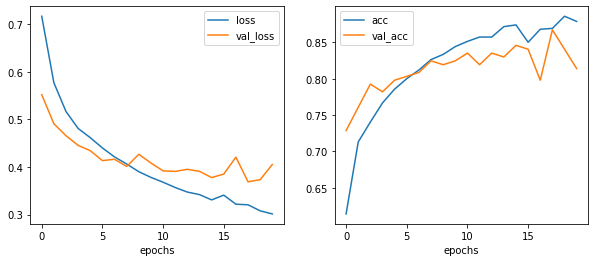

In [137]:
plot_loss_acc(model_res_history)

In [155]:
model_res = tf.keras.models.load_model('./Image Classification/model experiments/model_res')
model_res.evaluate(test_data)

6/6 [==============================] - 5s 871ms/step - loss: 0.3689 - accuracy: 0.8670


[0.368879109621048, 0.8670212626457214]

## Efficient Net 

In [138]:
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                         trainable= False,
                                         name = 'feature_extraction_layer',
                                         input_shape = (150,150,3))

tf.random.set_seed(42)

model_effi = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1, activation = 'sigmoid', name = 'output_layer')
],name= 'model_effi')

#
model_effi.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

model_effi_history = model_effi.fit(train_data,
                               steps_per_epoch= len(train_data), 
                                epochs = 30,
                                verbose=1,
                                callbacks = [create_callback(model_effi.name)],
                                validation_data= test_data,
                                validation_steps= len(test_data))

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.6656 - accuracy: 0.6012INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 52s 2s/step - loss: 0.6656 - accuracy: 0.6012 - val_loss: 0.5673 - val_accuracy: 0.8032
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.5911 - accuracy: 0.7369INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 47s 2s/step - loss: 0.5911 - accuracy: 0.7369 - val_loss: 0.4969 - val_accuracy: 0.8404
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7583INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 51s 2s/step - loss: 0.5540 - accuracy: 0.7583 - val_loss: 0.4572 - val_accuracy: 0.8777
Epoch 4/30
27/27 [==============================] - ETA: 0s - loss: 0.5311 - accuracy: 0.7762INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 50s 2s/step - loss: 0.5311 - accuracy: 0.7762 - val_loss: 0.4334 - val_accuracy: 0.8670
Epoch 5/30
27/27 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.7786INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 51s 2s/step - loss: 0.5142 - accuracy: 0.7786 - val_loss: 0.4166 - val_accuracy: 0.8777
Epoch 6/30
27/27 [==============================] - ETA: 0s - loss: 0.5005 - accuracy: 0.7821INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 55s 2s/step - loss: 0.5005 - accuracy: 0.7821 - val_loss: 0.4052 - val_accuracy: 0.8883
Epoch 7/30
27/27 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.7798INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 58s 2s/step - loss: 0.4874 - accuracy: 0.7798 - val_loss: 0.3943 - val_accuracy: 0.8670
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.7881INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 50s 2s/step - loss: 0.4778 - accuracy: 0.7881 - val_loss: 0.3883 - val_accuracy: 0.8723
Epoch 9/30
27/27 [==============================] - ETA: 0s - loss: 0.4689 - accuracy: 0.7988INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 54s 2s/step - loss: 0.4689 - accuracy: 0.7988 - val_loss: 0.3818 - val_accuracy: 0.8777
Epoch 10/30
27/27 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.8000INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 54s 2s/step - loss: 0.4634 - accuracy: 0.8000 - val_loss: 0.3746 - val_accuracy: 0.8830
Epoch 11/30
27/27 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.8036INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 56s 2s/step - loss: 0.4550 - accuracy: 0.8036 - val_loss: 0.3744 - val_accuracy: 0.8777
Epoch 12/30
27/27 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8095INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 55s 2s/step - loss: 0.4490 - accuracy: 0.8095 - val_loss: 0.3694 - val_accuracy: 0.8830
Epoch 13/30
27/27 [==============================] - 22s 814ms/step - loss: 0.4434 - accuracy: 0.8190 - val_loss: 0.3730 - val_accuracy: 0.8670
Epoch 14/30
27/27 [==============================] - ETA: 0s - loss: 0.4395 - accuracy: 0.8274INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 57s 2s/step - loss: 0.4395 - accuracy: 0.8274 - val_loss: 0.3635 - val_accuracy: 0.8830
Epoch 15/30
27/27 [==============================] - 23s 870ms/step - loss: 0.4325 - accuracy: 0.8238 - val_loss: 0.3681 - val_accuracy: 0.8511
Epoch 16/30
27/27 [==============================] - ETA: 0s - loss: 0.4289 - accuracy: 0.8202INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 57s 2s/step - loss: 0.4289 - accuracy: 0.8202 - val_loss: 0.3628 - val_accuracy: 0.8830
Epoch 17/30
27/27 [==============================] - ETA: 0s - loss: 0.4247 - accuracy: 0.8274INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 55s 2s/step - loss: 0.4247 - accuracy: 0.8274 - val_loss: 0.3597 - val_accuracy: 0.8883
Epoch 18/30
27/27 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.8250INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 58s 2s/step - loss: 0.4224 - accuracy: 0.8250 - val_loss: 0.3568 - val_accuracy: 0.8777
Epoch 19/30
27/27 [==============================] - 22s 832ms/step - loss: 0.4154 - accuracy: 0.8238 - val_loss: 0.3644 - val_accuracy: 0.8511
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.8202INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 53s 2s/step - loss: 0.4222 - accuracy: 0.8202 - val_loss: 0.3549 - val_accuracy: 0.8777
Epoch 21/30
27/27 [==============================] - 23s 837ms/step - loss: 0.4078 - accuracy: 0.8381 - val_loss: 0.3560 - val_accuracy: 0.8723
Epoch 22/30
27/27 [==============================] - 23s 850ms/step - loss: 0.4071 - accuracy: 0.8262 - val_loss: 0.3549 - val_accuracy: 0.8723
Epoch 23/30
27/27 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8357INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 58s 2s/step - loss: 0.4020 - accuracy: 0.8357 - val_loss: 0.3544 - val_accuracy: 0.8617
Epoch 24/30
27/27 [==============================] - ETA: 0s - loss: 0.3984 - accuracy: 0.8405INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 56s 2s/step - loss: 0.3984 - accuracy: 0.8405 - val_loss: 0.3530 - val_accuracy: 0.8617
Epoch 25/30
27/27 [==============================] - 25s 910ms/step - loss: 0.3960 - accuracy: 0.8369 - val_loss: 0.3607 - val_accuracy: 0.8457
Epoch 26/30
27/27 [==============================] - 25s 910ms/step - loss: 0.3951 - accuracy: 0.8405 - val_loss: 0.3543 - val_accuracy: 0.8670
Epoch 27/30
27/27 [==============================] - 24s 872ms/step - loss: 0.3928 - accuracy: 0.8357 - val_loss: 0.3576 - val_accuracy: 0.8564
Epoch 28/30
27/27 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8429INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


INFO:tensorflow:Assets written to: E:/Projects/Image Classification/model experiments\model_effi\assets


27/27 [==============================] - 57s 2s/step - loss: 0.3857 - accuracy: 0.8429 - val_loss: 0.3512 - val_accuracy: 0.8723
Epoch 29/30
27/27 [==============================] - 24s 899ms/step - loss: 0.3838 - accuracy: 0.8405 - val_loss: 0.3522 - val_accuracy: 0.8670
Epoch 30/30
27/27 [==============================] - 23s 863ms/step - loss: 0.3802 - accuracy: 0.8393 - val_loss: 0.3559 - val_accuracy: 0.8617


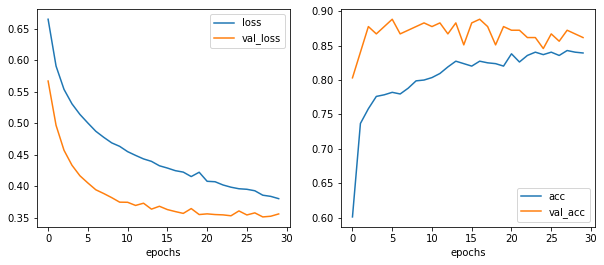

In [140]:
plot_loss_acc(model_effi_history)

In [154]:
model_effi = tf.keras.models.load_model('E:/Projects/Image Classification/model experiments/model_effi')
model_effi.evaluate(test_data)

6/6 [==============================] - 4s 683ms/step - loss: 0.3512 - accuracy: 0.8723


[0.3511575758457184, 0.8723404407501221]

In [144]:
y_preds = tf.round(model_1.predict(test_data)).numpy()
y_preds[:10]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

### Testing model with downloaded image

For the final prediction and testing, we use **Efficient**. It should be mentioned that **Resnet** model accuracy is very close. There is not much difference between them in our case.

In [ ]:
def load_prep_image(filename, model_name, image_shape =150):
    '''Import an image from file, transform it to tensor.
    Resize the image same as model training and predict the image'''
    img = tf.io.read_file(filename)  #'E:/Projects/african_elephant_01.jpg'
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[image_shape,image_shape])
    img = img/255
    preds = model_name.predict(tf.expand_dims(img, axis=0))
    preds = class_names[int(tf.round(preds))]
    plt.imshow(img)
    plt.title('Prediction: {}'.format(preds))
    plt.axis(False)
    plt.show()

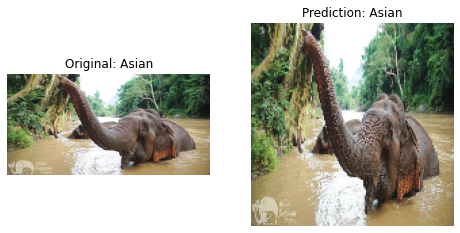

In [153]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.imshow(mpimg.imread('./Downloaded Image/asian_elephant_in_water.jpg'))
plt.title('Original: Asian')
plt.axis(False)
plt.subplot(1,2,2)
load_prep_image('./Downloaded Image/asian_elephant_in_water.jpg', model_effi, image_shape=150)

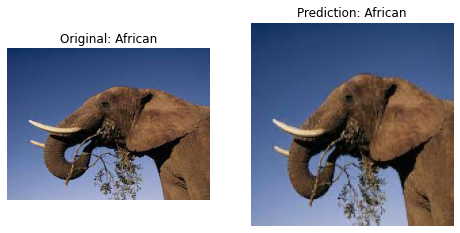

In [152]:
plt.figure(figsize = (8,6))
plt.subplot(1,2,1)
plt.imshow(mpimg.imread('./Downloaded Image/african_elephant_01.jpg'))
plt.title('Original: African')
plt.axis(False)
plt.subplot(1,2,2)
load_prep_image('./Downloaded Image/african_elephant_01.jpg', model_effi, image_shape=150)